In [ ]:
# google colab 환경에서 수행 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 12 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (41.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

Text(0.5, 1.0, '가나다라')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


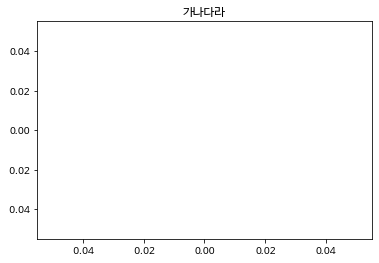

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
## 코랩에서 실행할시
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
loan_user = pd.read_csv('/content/drive/MyDrive/2022빅콘/data/merge_user_loan_3.csv')

In [ ]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
loan_user['loanapply_insert_time'] = pd.to_datetime(loan_user['loanapply_insert_time'])
loan_user['insert_time'] = pd.to_datetime(loan_user['insert_time'])

In [ ]:
loan_user[['application_id', 'bank_id', 'product_id', 'is_applied', 'user_id', 'gender', 'personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn']] = loan_user[[
    'application_id', 'bank_id', 'product_id', 'is_applied', 'user_id', 'gender', 'personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn']].astype(object)

In [ ]:
loan_user_train = loan_user.loc[loan_user['is_applied'].isna() == False]
loan_user_test = loan_user.loc[loan_user['is_applied'].isna() == True]

In [ ]:
loan_user_train.reset_index(drop = True, inplace = True)
loan_user_test.reset_index(drop = True, inplace = True)

## 전반적인 EDA

In [ ]:
loan_user_train.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,date
0,2157865,2022-05-09 08:44:59,54,235,20000000.0,16.5,1.0,346970.0,1970.0,1.0,2022-05-09 08:44:57,540.0,32000000.0,EARNEDINCOME,201312.0,정규직,자가,10000000.0,생활비,0.0,NaN,12.0,162000000.0,2022-05-09
1,576643,2022-05-09 10:54:53,54,235,11000000.0,16.5,0.0,545882.0,1977.0,1.0,2022-05-09 10:54:51,580.0,72000000.0,EARNEDINCOME,201908.0,정규직,전월세,20000000.0,생활비,0.0,NaN,7.0,106000000.0,2022-05-09
2,576643,2022-05-09 10:54:53,11,118,3000000.0,20.0,0.0,545882.0,1977.0,1.0,2022-05-09 10:54:51,580.0,72000000.0,EARNEDINCOME,201908.0,정규직,전월세,20000000.0,생활비,0.0,NaN,7.0,106000000.0,2022-05-09
3,2136706,2022-05-09 10:41:06,42,216,10000000.0,13.5,0.0,558819.0,1983.0,1.0,2022-05-09 10:41:05,740.0,39000000.0,EARNEDINCOME,201203.0,정규직,전월세,80000000.0,대환대출,0.0,NaN,2.0,58000000.0,2022-05-09
4,2136706,2022-05-09 10:41:07,25,169,22000000.0,15.9,0.0,558819.0,1983.0,1.0,2022-05-09 10:41:05,740.0,39000000.0,EARNEDINCOME,201203.0,정규직,전월세,80000000.0,대환대출,0.0,NaN,2.0,58000000.0,2022-05-09


In [ ]:
loan_user_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10264376 entries, 0 to 10264375
Data columns (total 24 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   application_id                       object        
 1   loanapply_insert_time                datetime64[ns]
 2   bank_id                              object        
 3   product_id                           object        
 4   loan_limit                           float64       
 5   loan_rate                            float64       
 6   is_applied                           object        
 7   user_id                              object        
 8   birth_year                           float64       
 9   gender                               object        
 10  insert_time                          datetime64[ns]
 11  credit_score                         float64       
 12  yearly_income                        float64       
 13  income_type              

In [ ]:
loan_user_train.isna().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                   0
loan_rate                                    0
is_applied                                   0
user_id                                      0
birth_year                               77228
gender                                   77228
insert_time                                  0
credit_score                           1243297
yearly_income                                0
income_type                                  0
company_enter_month                     302707
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn             5870440
personal_rehabilitation_complete_yn    9227196
existing_loan

In [ ]:
loan_user_train.describe()

,loan_limit,loan_rate,birth_year,credit_score,yearly_income,company_enter_month,desired_amount,existing_loan_cnt,existing_loan_amt
count,1.026438e+07,1.026438e+07,1.018715e+07,9.021079e+06,1.026438e+07,9.961669e+06,1.026438e+07,8.121327e+06,7.221365e+06
mean,2.260827e+07,1.276589e+01,1.982784e+03,7.501043e+02,4.792393e+07,2.017740e+05,5.160684e+07,3.644892e+00,8.168326e+07
std,2.230741e+07,3.886453e+00,9.640376e+00,1.274829e+02,1.318979e+08,5.427783e+02,2.323846e+08,3.145168e+00,9.825316e+07
min,0.000000e+00,1.500000e+00,1.930000e+03,1.000000e+02,0.000000e+00,1.911090e+05,0.000000e+00,1.000000e+00,0.000000e+00
25%,9.000000e+06,9.500000e+00,1.976000e+03,6.500000e+02,2.900000e+07,2.017010e+05,1.000000e+07,1.000000e+00,2.500000e+07
50%,1.800000e+07,1.320000e+01,1.984000e+03,7.300000e+02,3.600000e+07,2.020030e+05,2.800000e+07,3.000000e+00,4.900000e+07
75%,3.300000e+07,1.580000e+01,1.990000e+03,8.600000e+02,5.000000e+07,2.021070e+05,5.000000e+07,5.000000e+00,9.700000e+07
max,1.000000e+10,2.000000e+01,2.003000e+03,1.000000e+03,1.000000e+10,2.022110e+05,1.000000e+10,1.780000e+02,7.512000e+09


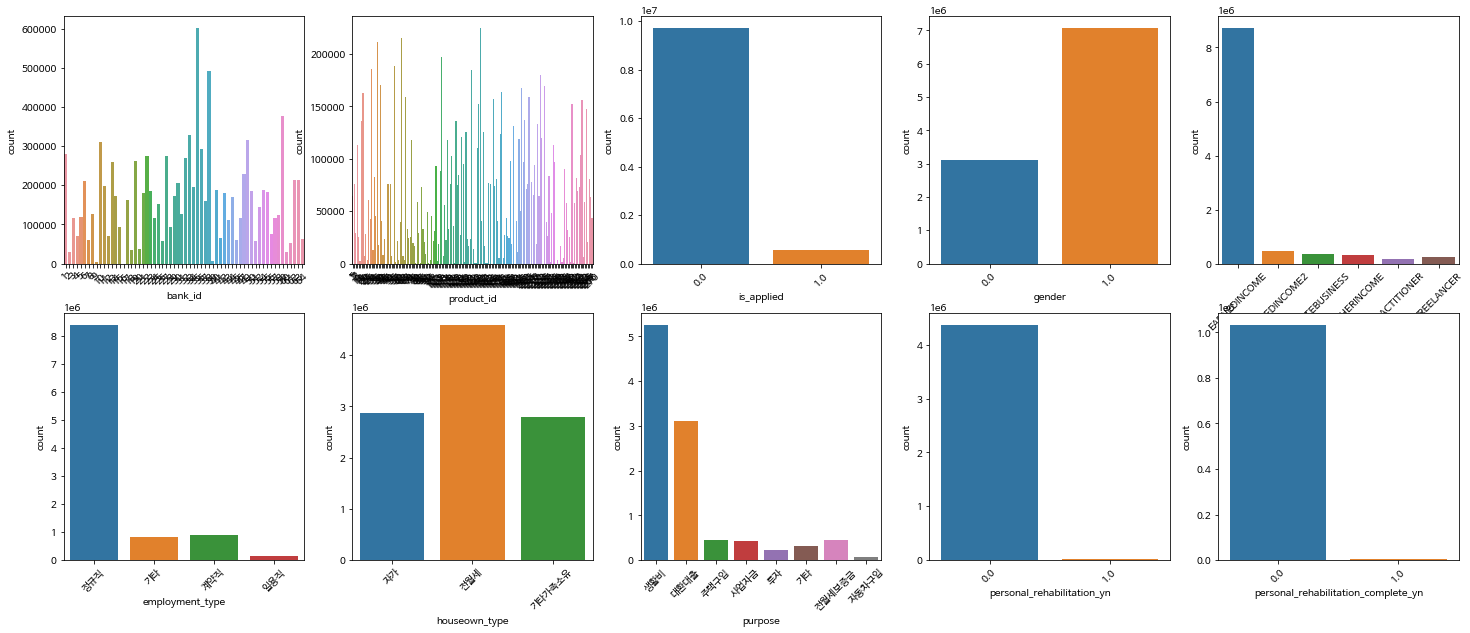

In [ ]:
categ_list = ['bank_id', 'product_id', 'is_applied', 'gender', 'income_type', 'employment_type', 'houseown_type', 'purpose', 
              'personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn']

plt.figure(figsize = (25,10))
for i in range(1,11):
    plt.subplot(2,5,i)
    sns.countplot(data = loan_user_train, x = categ_list[i-1])
    plt.xticks(rotation = 45)
plt.show()


### application_id

In [ ]:
print(len(loan_user_train['application_id'].unique())) # 유니크 개수
print(loan_user_train.shape[0] / len(loan_user_train['application_id'].unique())) # 신청서에 나오는 평균 상품수

728862
14.08274268654423


In [ ]:
app_id = loan_user_train.groupby('application_id', as_index = False).agg({'product_id' : 'count', 'is_applied' : 'sum'})
app_id.sort_values('product_id', inplace = True)
app_id

,application_id,product_id,is_applied
201628,599593,1,0.0
491548,1461831,1,1.0
599213,1782723,1,1.0
253697,754397,1,0.0
402971,1198758,1,1.0
...,...,...,...
210263,625274,78,1.0
488025,1451284,78,0.0
91257,271542,78,0.0
367968,1094634,78,1.0


In [ ]:
app_id.describe()

,application_id,product_id,is_applied
count,728862.00000,728862.00000,728862.00000
mean,1084009.62035,14.08274,0.76105
std,625795.65566,15.69885,1.00278
min,1.00000,1.00000,0.00000
25%,541742.50000,2.00000,0.00000
50%,1084363.50000,8.00000,1.00000
75%,1626386.00000,20.00000,1.00000
max,2167826.00000,79.00000,22.00000


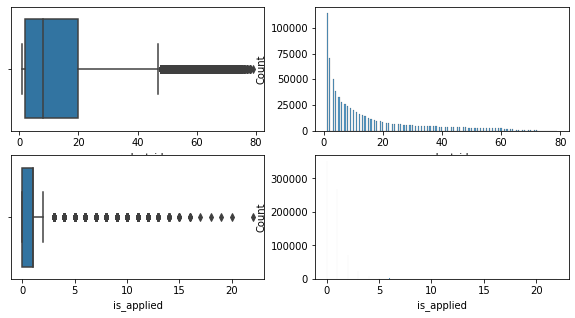

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(2,2,1)
sns.boxplot(data = app_id, x = 'product_id')

plt.subplot(2,2,2)
sns.histplot(data = app_id, x = 'product_id')

plt.subplot(2,2,3)
sns.boxplot(data = app_id, x = 'is_applied')

plt.subplot(2,2,4)
sns.histplot(data = app_id, x = 'is_applied')
plt.show()

In [ ]:
app_id['yes'] = 0
app_id.loc[app_id['is_applied']>=1, 'yes'] = 1
app_id['yes'].value_counts()

1    377506
0    351356
Name: yes, dtype: int64

In [ ]:
app_id2 = app_id.groupby('product_id', as_index = False).agg({'application_id' : 'count', 'yes' : 'sum'})
app_id2.columns = ['count', 'people', 'y_people']
app_id2['percent'] = app_id2['y_people'] / app_id2['people']
app_id2

,count,people,y_people,percent
0,1,114683,57498,0.501365
1,2,71132,39442,0.554490
2,3,49997,28334,0.566714
3,4,38604,21948,0.568542
4,5,32635,18531,0.567826
...,...,...,...,...
74,75,41,11,0.268293
75,76,24,6,0.250000
76,77,12,5,0.416667
77,78,8,4,0.500000


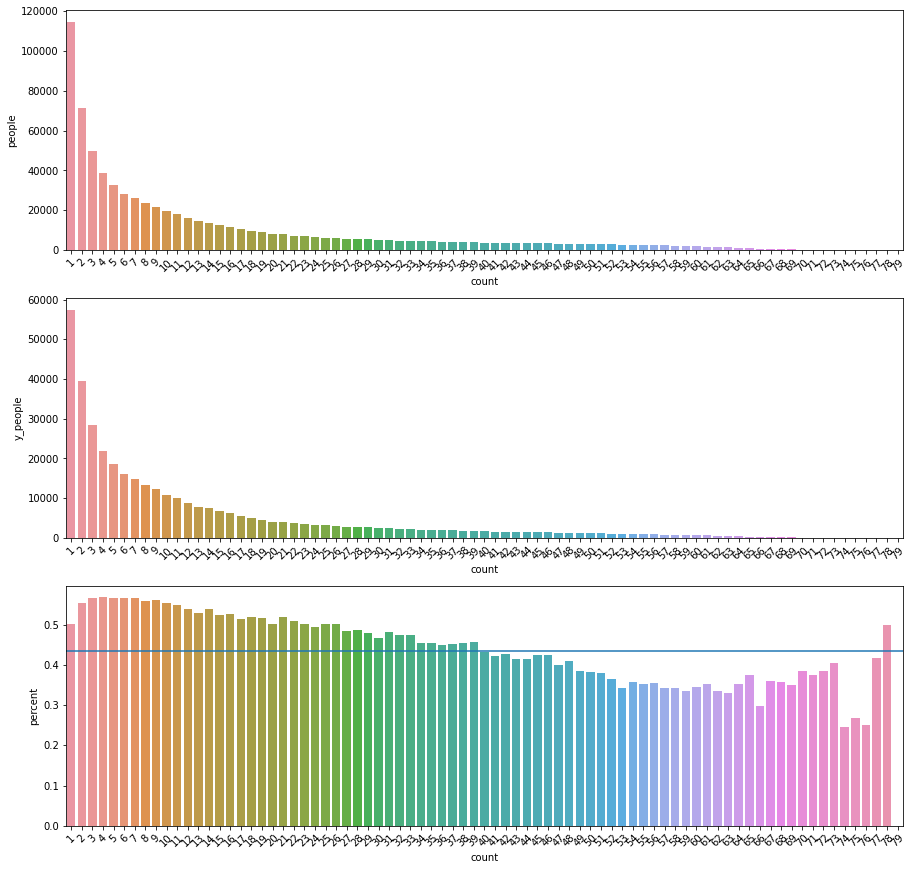

In [ ]:
plt.figure(figsize = (15, 15))
plt.subplot(3,1,1)
sns.barplot(data = app_id2, x = 'count', y = 'people')
plt.xticks(rotation = 45)

plt.subplot(3,1,2)
sns.barplot(data = app_id2, x = 'count', y = 'y_people')
plt.xticks(rotation = 45)

plt.subplot(3,1,3)
sns.barplot(data = app_id2, x = 'count', y = 'percent')
plt.axhline(app_id2['percent'].mean())
plt.xticks(rotation = 45)
plt.show()

In [ ]:
app_id['is_applied'].value_counts()

0.00000     351356
1.00000     267626
2.00000      71143
3.00000      23308
4.00000       8720
5.00000       3593
6.00000       1590
7.00000        717
8.00000        387
9.00000        186
10.00000       101
11.00000        52
12.00000        35
13.00000        20
14.00000        14
15.00000         5
16.00000         4
22.00000         1
18.00000         1
17.00000         1
19.00000         1
20.00000         1
Name: is_applied, dtype: int64

### loanapply_insert_time

In [ ]:
loan_user_time = loan_user_train.copy()
loan_user_time['month'] = loan_user_time['loanapply_insert_time'].dt.month
loan_user_time['day'] = loan_user_time['loanapply_insert_time'].dt.day
loan_user_time['weekday'] = loan_user_time['loanapply_insert_time'].dt.weekday
loan_user_time.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,date,month,day,weekday
0,2157865,2022-05-09 08:44:59,54,235,20000000.0,16.5,1.0,346970.0,1970.0,1.0,2022-05-09 08:44:57,540.0,32000000.0,EARNEDINCOME,201312.0,정규직,자가,10000000.0,생활비,0.0,NaN,12.0,162000000.0,2022-05-09,5,9,0
1,576643,2022-05-09 10:54:53,54,235,11000000.0,16.5,0.0,545882.0,1977.0,1.0,2022-05-09 10:54:51,580.0,72000000.0,EARNEDINCOME,201908.0,정규직,전월세,20000000.0,생활비,0.0,NaN,7.0,106000000.0,2022-05-09,5,9,0
2,576643,2022-05-09 10:54:53,11,118,3000000.0,20.0,0.0,545882.0,1977.0,1.0,2022-05-09 10:54:51,580.0,72000000.0,EARNEDINCOME,201908.0,정규직,전월세,20000000.0,생활비,0.0,NaN,7.0,106000000.0,2022-05-09,5,9,0
3,2136706,2022-05-09 10:41:06,42,216,10000000.0,13.5,0.0,558819.0,1983.0,1.0,2022-05-09 10:41:05,740.0,39000000.0,EARNEDINCOME,201203.0,정규직,전월세,80000000.0,대환대출,0.0,NaN,2.0,58000000.0,2022-05-09,5,9,0
4,2136706,2022-05-09 10:41:07,25,169,22000000.0,15.9,0.0,558819.0,1983.0,1.0,2022-05-09 10:41:05,740.0,39000000.0,EARNEDINCOME,201203.0,정규직,전월세,80000000.0,대환대출,0.0,NaN,2.0,58000000.0,2022-05-09,5,9,0


In [ ]:
time = loan_user_time.groupby('application_id', as_index = False).agg({'month' : 'mean', 'day' : 'mean', 'weekday' : 'mean', 'is_applied' : 'sum'})
time

,application_id,month,day,weekday,is_applied
0,1,5.0,6.0,4.0,0.0
1,2,4.0,13.0,2.0,0.0
2,6,4.0,26.0,1.0,0.0
3,14,4.0,15.0,4.0,3.0
4,17,4.0,7.0,3.0,1.0
...,...,...,...,...,...
728857,2167811,4.0,11.0,0.0,1.0
728858,2167817,4.0,2.0,5.0,1.0
728859,2167819,3.0,7.0,0.0,0.0
728860,2167820,3.0,17.0,3.0,1.0


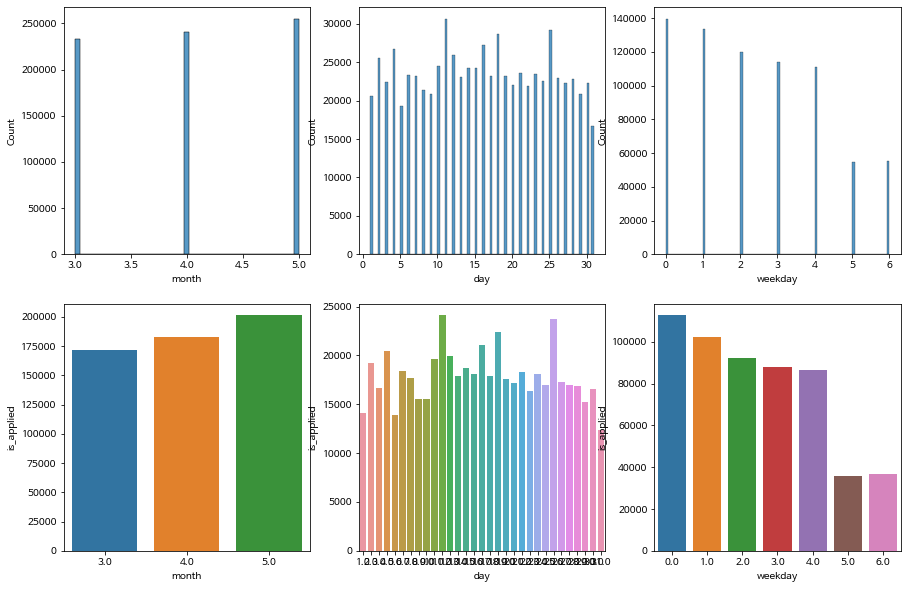

In [ ]:
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.histplot(data = time, x = 'month')

plt.subplot(2,3,2)
sns.histplot(data = time, x = 'day')

plt.subplot(2,3,3)
sns.histplot(data = time, x = 'weekday')

plt.subplot(2,3,4)
sns.barplot(data = time.groupby('month',as_index = False)['is_applied'].sum(), x = 'month', y = 'is_applied')

plt.subplot(2,3,5)
sns.barplot(data = time.groupby('day',as_index = False)['is_applied'].sum(), x = 'day', y = 'is_applied')

plt.subplot(2,3,6)
sns.barplot(data = time.groupby('weekday',as_index = False)['is_applied'].sum(), x = 'weekday', y = 'is_applied')

plt.show()

### bank_id

In [ ]:
len(loan_user_train['bank_id'].unique())

62

In [ ]:
bank_pro = loan_user_train.groupby(['bank_id','product_id'], as_index = False).agg({'application_id' : 'count', 'is_applied' : 'sum'})
bank_ex = bank_pro.groupby('bank_id', as_index = False)['product_id'].count()
bank_pro = pd.merge(bank_pro, bank_ex, on = 'bank_id')
bank_pro

,bank_id,product_id_x,application_id,is_applied,product_id_y
0,1,1,64708,3596.00000,2
1,1,61,215179,15300.00000,2
2,2,7,29084,2732.00000,3
3,2,93,107,30.00000,3
4,2,126,298,116.00000,3
...,...,...,...,...,...
163,62,200,136637,15922.00000,2
164,63,184,43036,4949.00000,2
165,63,226,169772,7344.00000,2
166,64,245,5531,463.00000,2


In [ ]:
bank = bank_pro.groupby('bank_id', as_index = False).agg({'application_id' : 'sum', 'is_applied' : 'sum', 'product_id_y' : 'mean'})
bank['percent'] = bank['is_applied'] / bank['application_id']
bank

,bank_id,application_id,is_applied,product_id_y,percent
0,1,279887,18896.00000,2.00000,0.06751
1,2,29489,2878.00000,3.00000,0.09760
2,3,116570,2310.00000,2.00000,0.01982
3,4,70798,14130.00000,2.00000,0.19958
4,5,119160,6839.00000,1.00000,0.05739
...,...,...,...,...,...
57,60,30613,3455.00000,2.00000,0.11286
58,61,51519,546.00000,2.00000,0.01060
59,62,212342,19407.00000,2.00000,0.09140
60,63,212808,12293.00000,2.00000,0.05777


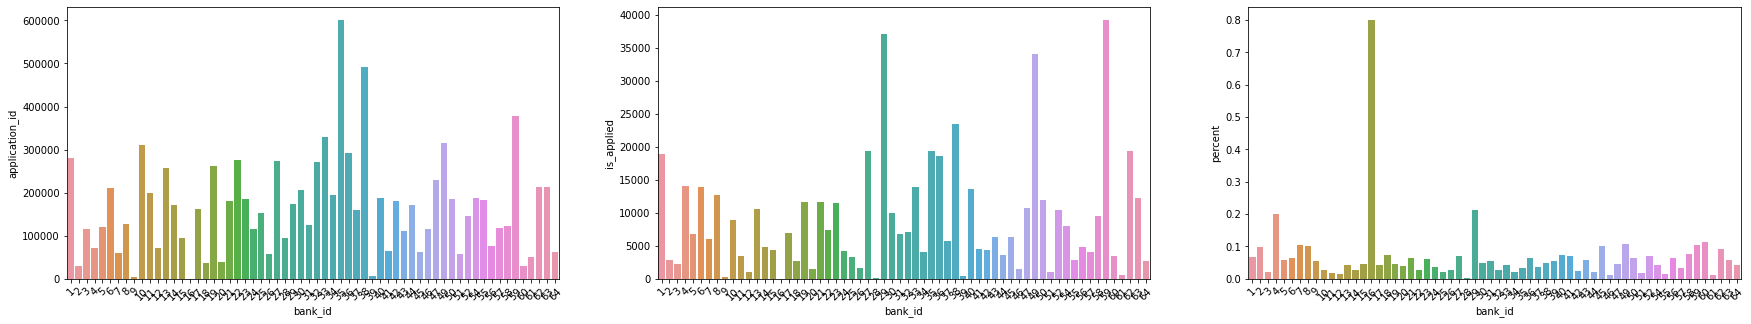

In [ ]:
plt.figure(figsize = (30,5))
plt.subplot(1,3,1)
sns.barplot(data = bank, x = 'bank_id', y = 'application_id')
plt.xticks(rotation = 45)

plt.subplot(1,3,2)
sns.barplot(data = bank, x = 'bank_id', y = 'is_applied')
plt.xticks(rotation = 45)

plt.subplot(1,3,3)
sns.barplot(data = bank, x = 'bank_id', y = 'percent')
plt.xticks(rotation = 45)
plt.show()

### product_id

In [ ]:
product = bank_pro.drop(['bank_id', 'product_id_y'], axis = 1)
product['percent'] = product['is_applied'] / product['application_id']
product

,product_id_x,application_id,is_applied,percent
0,1,64708,3596.00000,0.05557
1,61,215179,15300.00000,0.07110
2,7,29084,2732.00000,0.09393
3,93,107,30.00000,0.28037
4,126,298,116.00000,0.38926
...,...,...,...,...
163,200,136637,15922.00000,0.11653
164,184,43036,4949.00000,0.11500
165,226,169772,7344.00000,0.04326
166,245,5531,463.00000,0.08371


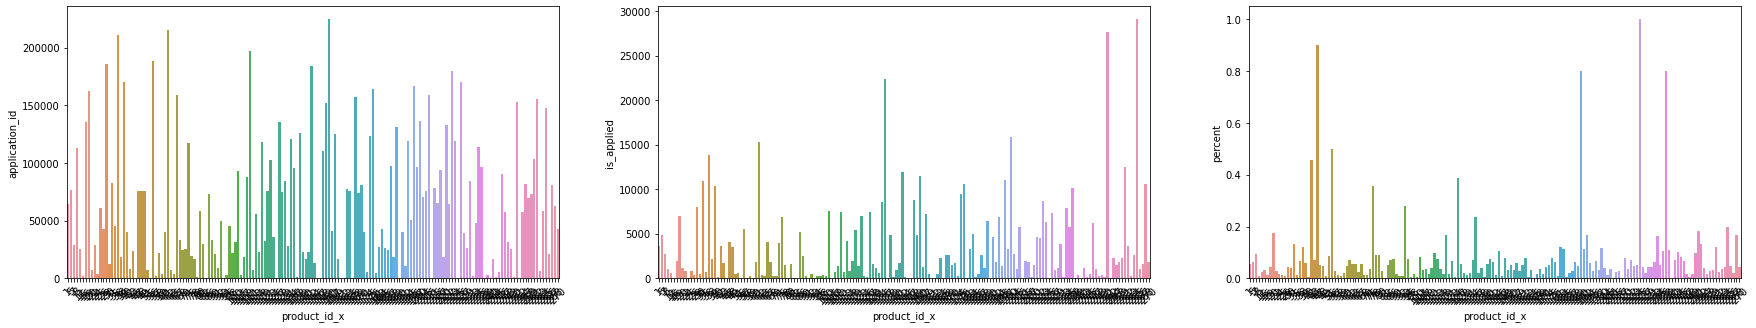

In [ ]:
plt.figure(figsize = (30,5))
plt.subplot(1,3,1)
sns.barplot(data = product, x = 'product_id_x', y = 'application_id')
plt.xticks(rotation = 45)

plt.subplot(1,3,2)
sns.barplot(data = product, x = 'product_id_x', y = 'is_applied')
plt.xticks(rotation = 45)

plt.subplot(1,3,3)
sns.barplot(data = product, x = 'product_id_x', y = 'percent')
plt.xticks(rotation = 45)
plt.show()

### loan_limit

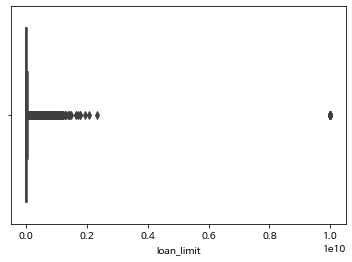

In [ ]:
sns.boxplot(data = loan_user_train, x = 'loan_limit')
plt.show()

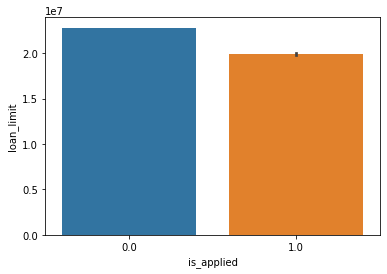

In [ ]:
sns.barplot(data = loan_user_train, x = 'is_applied', y = 'loan_limit')
plt.show()

In [ ]:
loan_user_train['loan_limit'].describe()

count      10264376.00000
mean       22608267.17572
std        22307411.84225
min               0.00000
25%         9000000.00000
50%        18000000.00000
75%        33000000.00000
max     10000000000.00000
Name: loan_limit, dtype: float64

In [ ]:
na_ex_limit = loan_user_train[loan_user_train['loan_limit'] <= 5000000000]

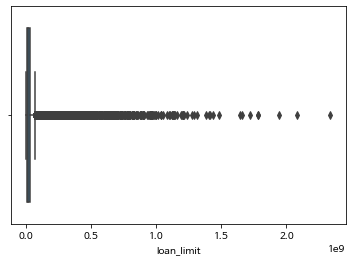

In [ ]:
sns.boxplot(data = na_ex_limit, x = 'loan_limit')
plt.show()

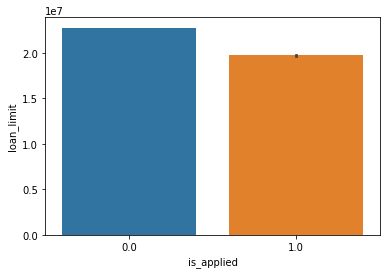

In [ ]:
sns.barplot(data = na_ex_limit, x = 'is_applied', y = 'loan_limit')
plt.show()

### loan_rate

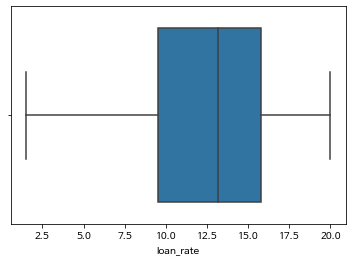

In [ ]:
sns.boxplot(data = loan_user_train, x = 'loan_rate')
plt.show()

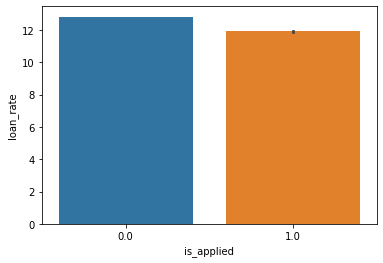

In [ ]:
sns.barplot(data = loan_user_train, x = 'is_applied', y = 'loan_rate')
plt.show()

In [ ]:
loan_user_train['loan_rate'].describe()

count   10264376.00000
mean          12.76589
std            3.88645
min            1.50000
25%            9.50000
50%           13.20000
75%           15.80000
max           20.00000
Name: loan_rate, dtype: float64

### user_id

In [ ]:
print(len(loan_user_train['user_id'].unique()))
print(len(set(loan_user_train['user_id']) - set(loan_user_test['user_id'])))
print(len(set(loan_user_test['user_id']) - set(loan_user_train['user_id'])))

259321
199273
58137


In [ ]:
# 유저별로 추천 받은 횟수랑 신청횟수랑 관련?
user = loan_user_train.groupby('user_id', as_index = False).agg({'application_id' : 'count', 'is_applied' : 'sum'})
user['percent'] = user['is_applied'] / user['application_id']
user

,user_id,application_id,is_applied,percent
0,9.00000,26,0.00000,0.00000
1,11.00000,50,3.00000,0.06000
2,14.00000,2,0.00000,0.00000
3,17.00000,5,2.00000,0.40000
4,19.00000,1,0.00000,0.00000
...,...,...,...,...
259316,879692.00000,60,6.00000,0.10000
259317,879693.00000,18,2.00000,0.11111
259318,879695.00000,5,1.00000,0.20000
259319,879696.00000,32,3.00000,0.09375


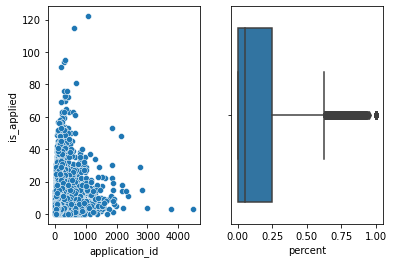

In [ ]:
plt.subplot(1,2,1)
sns.scatterplot(data = user, x = 'application_id', y = 'is_applied')

plt.subplot(1,2,2)
sns.boxplot(data = user, x = 'percent')
plt.show()

In [ ]:
user2 = loan_user_train.groupby(['user_id', 'application_id'], as_index = False).agg({'loan_limit' : 'count', 'is_applied' : 'sum'})
user2['percent'] = user2['is_applied'] / user2['loan_limit']
ex = pd.DataFrame(user2.groupby('user_id', as_index = False)['application_id'].cumcount() + 1 )
ex.columns = ['cumcount']
user2 = pd.concat([user2, ex], axis = 1)
user2

,user_id,application_id,loan_limit,is_applied,percent,cumcount
0,9.00000,248576,26,0.00000,0.00000,1
1,11.00000,1180616,25,2.00000,0.08000,1
2,11.00000,1751522,25,1.00000,0.04000,2
3,14.00000,1508745,2,0.00000,0.00000,1
4,17.00000,1990215,2,1.00000,0.50000,1
...,...,...,...,...,...,...
728857,879693.00000,1186879,3,0.00000,0.00000,3
728858,879695.00000,1774704,5,1.00000,0.20000,1
728859,879696.00000,1856758,16,1.00000,0.06250,1
728860,879696.00000,2149910,16,2.00000,0.12500,2


In [ ]:
user2.describe()

,user_id,application_id,loan_limit,is_applied,percent,cumcount
count,728862.00000,728862.00000,728862.00000,728862.00000,728862.00000,728862.00000
mean,440436.86932,1084009.62035,14.08274,0.76105,0.18615,4.73568
std,254236.29288,625795.65566,15.69885,1.00278,0.30861,7.98501
min,9.00000,1.00000,1.00000,0.00000,0.00000,1.00000
25%,220789.00000,541742.50000,2.00000,0.00000,0.00000,1.00000
50%,441354.00000,1084363.50000,8.00000,1.00000,0.02174,2.00000
75%,660615.25000,1626386.00000,20.00000,1.00000,0.23077,5.00000
max,879697.00000,2167826.00000,79.00000,22.00000,1.00000,267.00000


### birth_year

In [ ]:
age = loan_user_train.groupby('birth_year', as_index = False).agg({'application_id': 'count', 'is_applied' : 'sum'})
age['percent'] = age['is_applied'] / age['application_id']
age

,birth_year,application_id,is_applied,percent
0,1930.0,1,0.0,0.000000
1,1932.0,49,8.0,0.163265
2,1933.0,11,4.0,0.363636
3,1934.0,28,12.0,0.428571
4,1935.0,64,25.0,0.390625
...,...,...,...,...
68,1999.0,86358,9690.0,0.112207
69,2000.0,56153,7682.0,0.136805
70,2001.0,27552,4313.0,0.156540
71,2002.0,9735,1900.0,0.195172


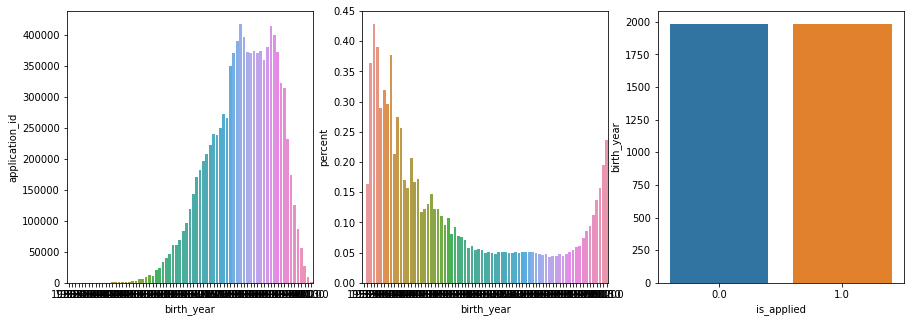

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
sns.barplot(data = age, x = 'birth_year', y = 'application_id')
plt.subplot(1,3,2)
sns.barplot(data = age, x = 'birth_year', y = 'percent')
plt.subplot(1,3,3)
sns.barplot(data = loan_user_train, x = 'is_applied', y = 'birth_year')
plt.show()

### gender

In [ ]:
gender = loan_user_train.groupby('gender', as_index = False).agg({'application_id': 'count', 'is_applied' : 'sum'})
gender['percent'] = gender['is_applied'] / gender['application_id']
gender

,gender,application_id,is_applied,percent
0,0.0,3121684,181308.0,0.058080
1,1.0,7065464,369658.0,0.052319


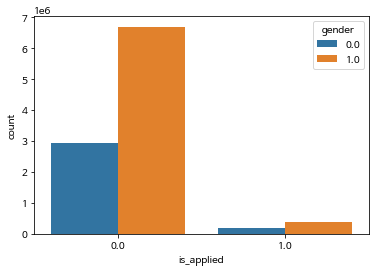

In [ ]:
sns.countplot(data = loan_user_train, x = 'is_applied', hue = 'gender')

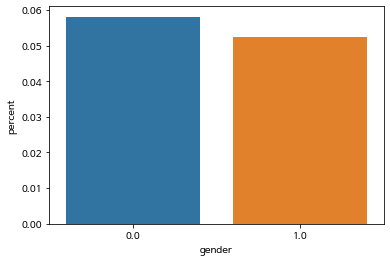

In [ ]:
sns.barplot(data = gender, x = 'gender', y = 'percent')

### insert_time

### credit_score

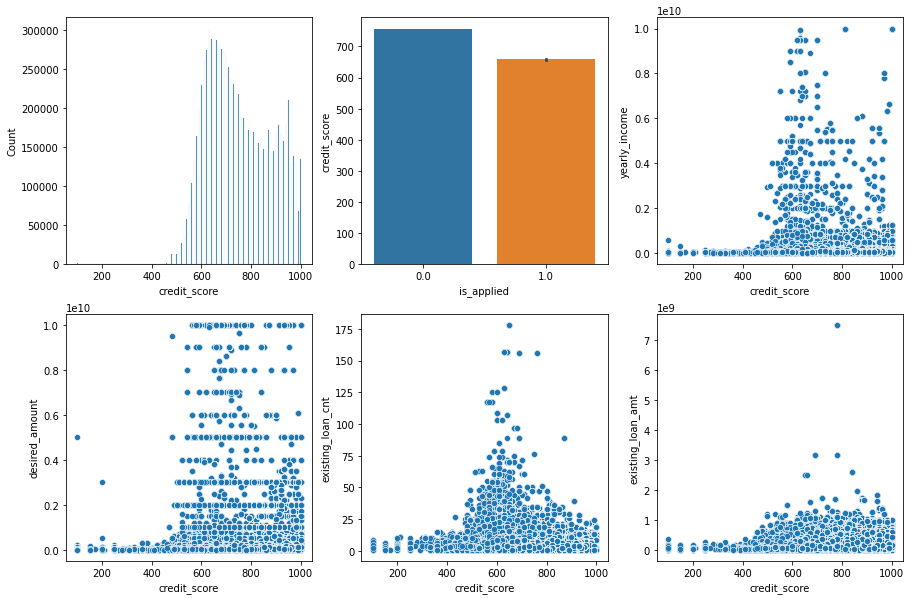

In [ ]:
plt.figure(figsize = (15, 10))
plt.subplot(2,3,1)
sns.histplot(data = loan_user_train, x = 'credit_score')
plt.subplot(2,3,2)
sns.barplot(data = loan_user_train, x = 'is_applied', y = 'credit_score')
plt.subplot(2,3,3)
sns.scatterplot(data = loan_user_train, x = 'credit_score', y = 'yearly_income')

plt.subplot(2,3,4)
sns.scatterplot(data = loan_user_train, x = 'credit_score', y = 'desired_amount')
plt.subplot(2,3,5)
sns.scatterplot(data = loan_user_train, x = 'credit_score', y = 'existing_loan_cnt')
plt.subplot(2,3,6)
sns.scatterplot(data = loan_user_train, x = 'credit_score', y = 'existing_loan_amt')
plt.show()

### yearly_income

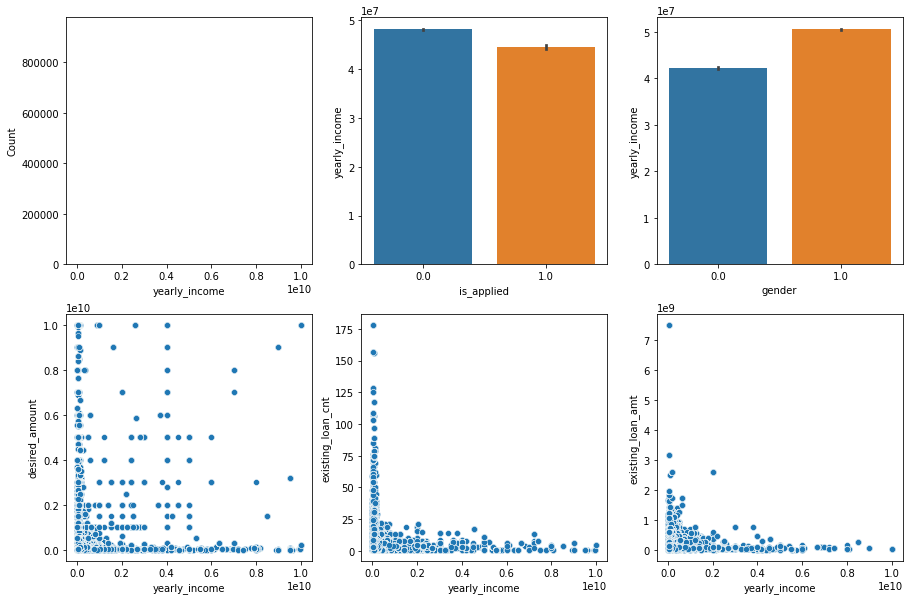

In [ ]:
plt.figure(figsize = (15, 10))
plt.subplot(2,3,1)
sns.histplot(data = loan_user_train, x = 'yearly_income')
plt.subplot(2,3,2)
sns.barplot(data = loan_user_train, x = 'is_applied', y = 'yearly_income')
plt.subplot(2,3,3)
sns.barplot(data = loan_user_train, x = 'gender', y = 'yearly_income')

plt.subplot(2,3,4)
sns.scatterplot(data = loan_user_train, x = 'yearly_income', y = 'desired_amount')
plt.subplot(2,3,5)
sns.scatterplot(data = loan_user_train, x = 'yearly_income', y = 'existing_loan_cnt')
plt.subplot(2,3,6)
sns.scatterplot(data = loan_user_train, x = 'yearly_income', y = 'existing_loan_amt')
plt.show()

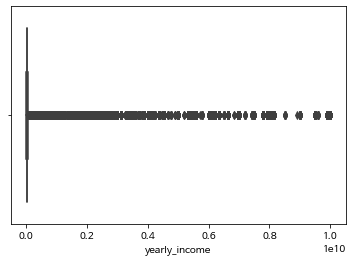

In [ ]:
sns.boxplot(data = loan_user_train, x = 'yearly_income')
plt.show()

In [ ]:
loan_user_train[['yearly_income']].describe()

,yearly_income
count,1.026438e+07
mean,4.792393e+07
std,1.318979e+08
min,0.000000e+00
25%,2.900000e+07
50%,3.600000e+07
75%,5.000000e+07
max,1.000000e+10


In [ ]:
y_income = loan_user_train[loan_user_train['yearly_income']<100000000]

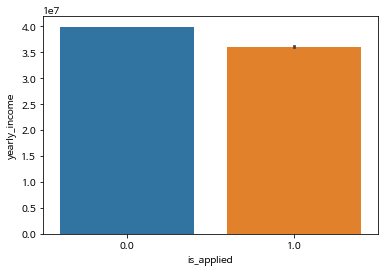

In [ ]:
sns.barplot(data = y_income, x = 'is_applied', y = 'yearly_income')
plt.show()

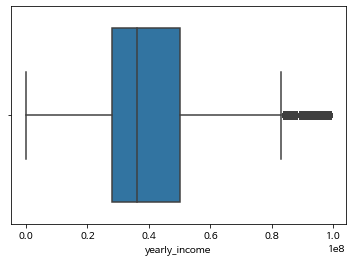

In [ ]:
sns.boxplot(data = y_income, x = 'yearly_income')

In [ ]:
loan_user_train[loan_user_train['yearly_income']>=100000000]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,date
196,1835670,2022-05-09 15:24:11,50,142,72000000.0,9.6,0.0,178632.0,1969.0,1.0,2022-05-09 15:24:10,NaN,140000000.0,EARNEDINCOME,200403.0,정규직,자가,50000000.0,생활비,0.0,NaN,4.0,849000000.0,2022-05-09
197,1835670,2022-05-09 15:24:11,17,19,27000000.0,9.5,0.0,178632.0,1969.0,1.0,2022-05-09 15:24:10,NaN,140000000.0,EARNEDINCOME,200403.0,정규직,자가,50000000.0,생활비,0.0,NaN,4.0,849000000.0,2022-05-09
198,1835670,2022-05-09 15:24:13,12,68,3000000.0,9.8,0.0,178632.0,1969.0,1.0,2022-05-09 15:24:10,NaN,140000000.0,EARNEDINCOME,200403.0,정규직,자가,50000000.0,생활비,0.0,NaN,4.0,849000000.0,2022-05-09
199,1835670,2022-05-09 15:24:11,10,149,70000000.0,12.4,0.0,178632.0,1969.0,1.0,2022-05-09 15:24:10,NaN,140000000.0,EARNEDINCOME,200403.0,정규직,자가,50000000.0,생활비,0.0,NaN,4.0,849000000.0,2022-05-09
200,1835670,2022-05-09 15:24:12,63,226,100000000.0,11.7,0.0,178632.0,1969.0,1.0,2022-05-09 15:24:10,NaN,140000000.0,EARNEDINCOME,200403.0,정규직,자가,50000000.0,생활비,0.0,NaN,4.0,849000000.0,2022-05-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10264285,763676,2022-05-16 13:39:39,54,259,50000000.0,9.0,0.0,318515.0,1981.0,1.0,2022-05-16 13:39:37,850.0,130000000.0,EARNEDINCOME,201210.0,정규직,전월세,100000000.0,전월세보증금,0.0,NaN,NaN,NaN,2022-05-16
10264286,763676,2022-05-16 13:39:39,36,60,80000000.0,13.4,0.0,318515.0,1981.0,1.0,2022-05-16 13:39:37,850.0,130000000.0,EARNEDINCOME,201210.0,정규직,전월세,100000000.0,전월세보증금,0.0,NaN,NaN,NaN,2022-05-16
10264287,763676,2022-05-16 13:39:38,10,65,70000000.0,12.4,0.0,318515.0,1981.0,1.0,2022-05-16 13:39:37,850.0,130000000.0,EARNEDINCOME,201210.0,정규직,전월세,100000000.0,전월세보증금,0.0,NaN,NaN,NaN,2022-05-16
10264288,763676,2022-05-16 13:39:37,13,262,3000000.0,13.8,0.0,318515.0,1981.0,1.0,2022-05-16 13:39:37,850.0,130000000.0,EARNEDINCOME,201210.0,정규직,전월세,100000000.0,전월세보증금,0.0,NaN,NaN,NaN,2022-05-16


### income_type

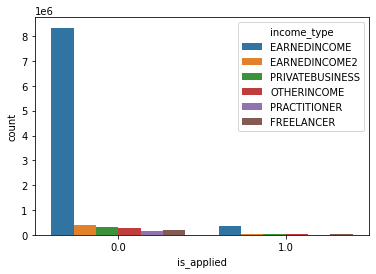

In [ ]:
sns.countplot(data = loan_user_train, x = 'is_applied', hue = 'income_type')

In [ ]:
income_t = loan_user_train.groupby(['income_type'], as_index = False).agg({'application_id' : 'count', 'is_applied' : 'sum'})
income_t['percent'] = income_t['is_applied'] / income_t['application_id']
income_t

,income_type,application_id,is_applied,percent
0,EARNEDINCOME,8712803,375978.0,0.043152
1,EARNEDINCOME2,471200,55630.0,0.118060
2,FREELANCER,247635,31484.0,0.127139
3,OTHERINCOME,304911,46081.0,0.151129
4,PRACTITIONER,156707,8527.0,0.054414
5,PRIVATEBUSINESS,371120,37003.0,0.099706


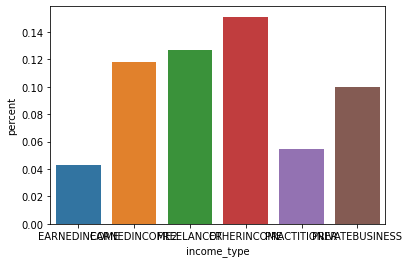

In [ ]:
sns.barplot(data = income_t, x = 'income_type', y = 'percent')

### company_enter_month

In [ ]:
# 근속월수로 돌린거 필요

### employment_type

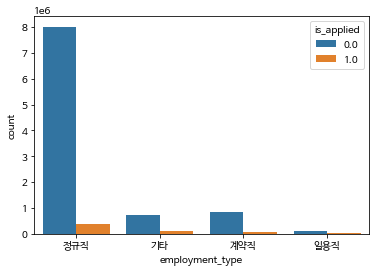

In [ ]:
sns.countplot(data = loan_user_train, x = 'employment_type', hue = 'is_applied')

In [ ]:
em_t = loan_user_train.groupby(['employment_type'], as_index = False).agg({'application_id' : 'count', 'is_applied' : 'sum', 'is_applied' : 'mean'})
em_t

,employment_type,application_id,is_applied
0,계약직,902710,0.063515
1,기타,827815,0.125329
2,일용직,138391,0.086689
3,정규직,8395460,0.045456


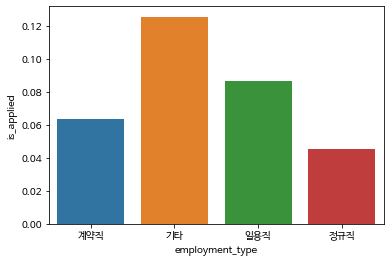

In [ ]:
sns.barplot(data = em_t, x = 'employment_type', y = 'is_applied')

### houseown_type

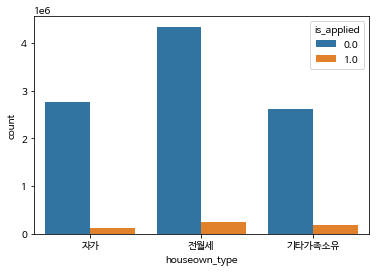

In [ ]:
sns.countplot(data = loan_user_train, x = 'houseown_type', hue = 'is_applied')

In [ ]:
ho_t = loan_user_train.groupby(['houseown_type'], as_index = False).agg({'application_id' : 'count', 'is_applied' : 'sum', 'is_applied' : 'mean'})
ho_t

,houseown_type,application_id,is_applied
0,기타가족소유,2797620,0.065506
1,자가,2875022,0.041674
2,전월세,4591734,0.054800


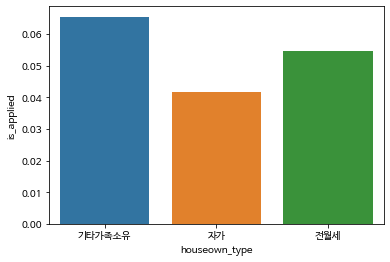

In [ ]:
sns.barplot(data = ho_t, x = 'houseown_type', y = 'is_applied')

### desired_amount

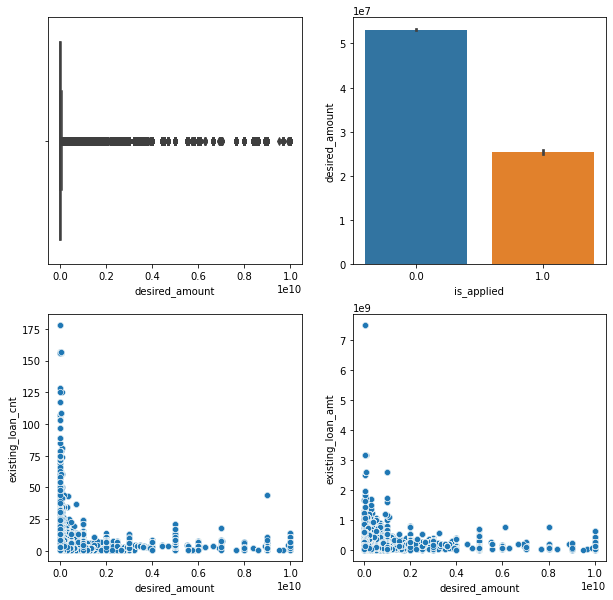

In [ ]:
plt.figure(figsize = (10, 10))
plt.subplot(2,2,1)
sns.boxplot(data = loan_user_train, x = 'desired_amount')
plt.subplot(2,2,2)
sns.barplot(data = loan_user_train, x = 'is_applied', y = 'desired_amount')
plt.subplot(2,2,3)
sns.scatterplot(data = loan_user_train, x = 'desired_amount', y = 'existing_loan_cnt')
plt.subplot(2,2,4)
sns.scatterplot(data = loan_user_train, x = 'desired_amount', y = 'existing_loan_amt')
plt.show()

### purpose

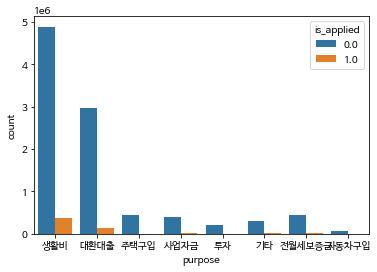

In [ ]:
sns.countplot(data = loan_user_train, x = 'purpose', hue = 'is_applied')

In [ ]:
po_t = loan_user_train.groupby(['purpose'], as_index = False).agg({'application_id' : 'count', 'is_applied' : 'sum', 'is_applied' : 'mean'})
po_t

,purpose,application_id,is_applied
0,기타,311121,0.040187
1,대환대출,3098310,0.041516
2,사업자금,426316,0.055166
3,생활비,5260304,0.070747
4,자동차구입,58503,0.023725
5,전월세보증금,442490,0.017223
6,주택구입,444044,0.007851
7,투자,223288,0.024211


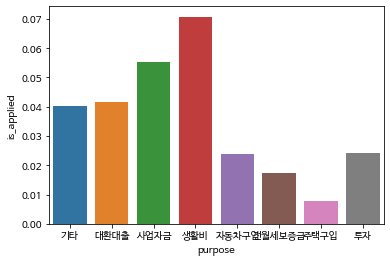

In [ ]:
sns.barplot(data = po_t, x = 'purpose', y = 'is_applied')

### personal_rehabilitation_yn

### personal_rehabilitation_complete_yn

### existing_loan_cnt

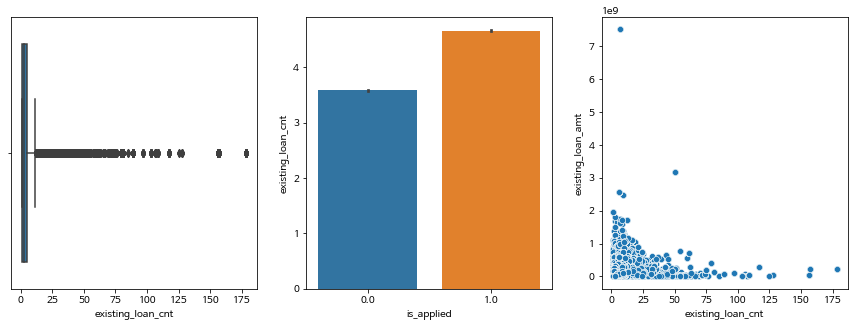

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1,3,1)
sns.boxplot(data = loan_user_train, x = 'existing_loan_cnt')
plt.subplot(1,3,2)
sns.barplot(data = loan_user_train, x = 'is_applied', y = 'existing_loan_cnt')
plt.subplot(1,3,3)
sns.scatterplot(data = loan_user_train, x = 'existing_loan_cnt', y = 'existing_loan_amt')
plt.show()

### existing_loan_amt

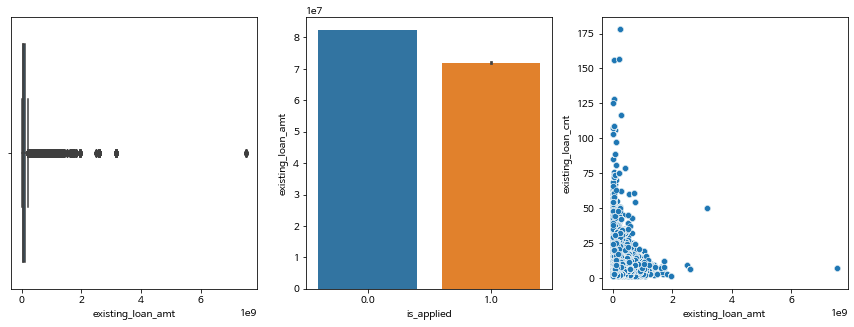

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1,3,1)
sns.boxplot(data = loan_user_train, x = 'existing_loan_amt')
plt.subplot(1,3,2)
sns.barplot(data = loan_user_train, x = 'is_applied', y = 'existing_loan_amt')
plt.subplot(1,3,3)
sns.scatterplot(data = loan_user_train, x = 'existing_loan_amt', y = 'existing_loan_cnt')
plt.show()